In [107]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')



In [108]:
df=pd.read_csv("googl_data_2020_2025.csv")


READING THE DATASET

In [109]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000


ANALYZING THE DATA

In [110]:
df.shape

(1260, 7)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [112]:
df.describe()

,Price,Adj Close,Close,High,Low,Open,Volume
count,1260,1259,1259,1259,1259,1259,1259
unique,1260,1240,1236,1224,1229,1221,1252
top,2024-12-31 00:00:00+00:00,105.5872421,105.9700012,138,138.8999939,119.2399979,22288000
freq,1,3,3,3,2,3,3


In [113]:
df.columns.tolist()

['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [114]:
df.isnull().sum()

Price        0
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64

In [115]:
df.nunique() #detrmine unique values 

Price        1260
Adj Close    1240
Close        1236
High         1224
Low          1229
Open         1221
Volume       1252
dtype: int64

In [116]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000


In [117]:
df = df.iloc[2:].reset_index(drop=True)
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
1,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
3,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
4,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000


In [118]:
# change the column name
df.rename(columns={"Price": "Date"}, inplace=True)
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
1,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
3,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
4,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000


In [119]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Identify numeric columns
numeric_cols = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]

# Convert columns to float
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

print(df.dtypes)

Date          object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object


In [120]:
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime('%Y-%m-%d')
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,68.186821,68.433998,68.433998,67.324501,67.420502,27278000
1,2020-01-03,67.830101,68.075996,68.687500,67.365997,67.400002,23408000
2,2020-01-06,69.638054,69.890503,69.916000,67.550003,67.581497,46768000
3,2020-01-07,69.503548,69.755501,70.175003,69.578003,70.023003,34330000
4,2020-01-08,69.998253,70.251999,70.592499,69.631500,69.740997,35314000


In [121]:
df["Price Change (%)"] = df["Close"].pct_change() * 100
df.dropna(inplace=True)


In [122]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Identify numeric columns
numeric_cols = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]

# Convert columns to float
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

print(df.dtypes)

Date                 object
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume                int64
Price Change (%)    float64
dtype: object


In [123]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Price Change (%)
1,2020-01-03,67.830101,68.075996,68.687500,67.365997,67.400002,23408000,-0.523134
2,2020-01-06,69.638054,69.890503,69.916000,67.550003,67.581497,46768000,2.665413
3,2020-01-07,69.503548,69.755501,70.175003,69.578003,70.023003,34330000,-0.193162
4,2020-01-08,69.998253,70.251999,70.592499,69.631500,69.740997,35314000,0.711769
5,2020-01-09,70.733093,70.989502,71.433998,70.510498,71.096497,33200000,1.049797


PLOTTING 

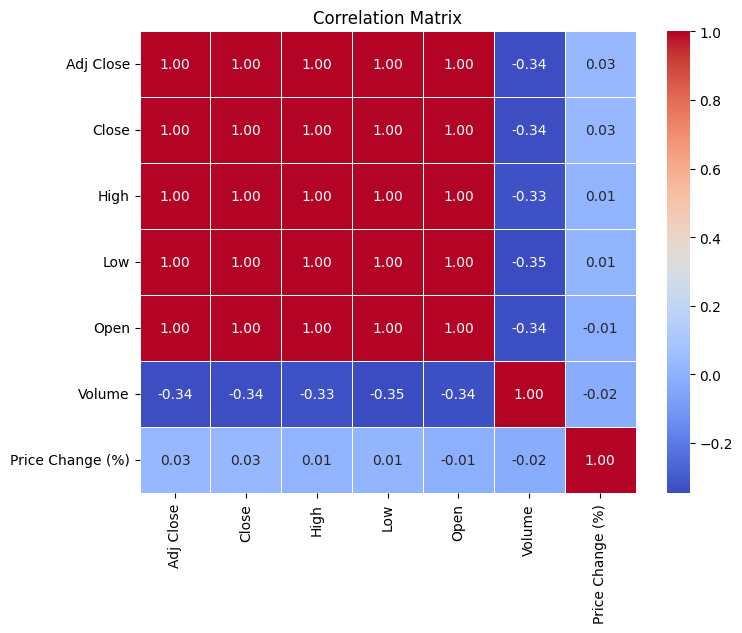

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.drop(columns=['Date']).corr()  #execlude date
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


GOOGLE STOCK PRICE OVER TIME 

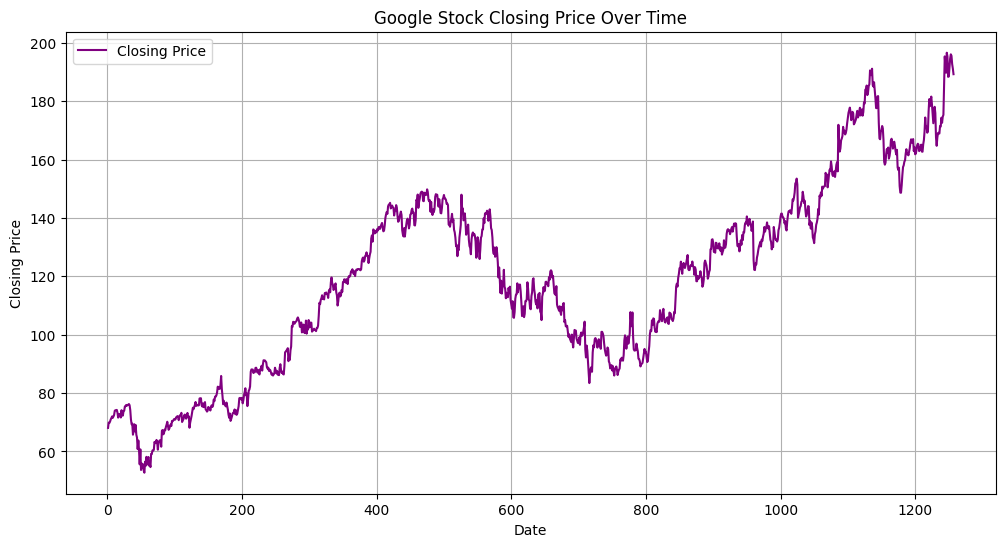

In [134]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", color="purple")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Google Stock Closing Price Over Time")
plt.legend()
plt.grid()
plt.show()

Price Change (%) Distribution


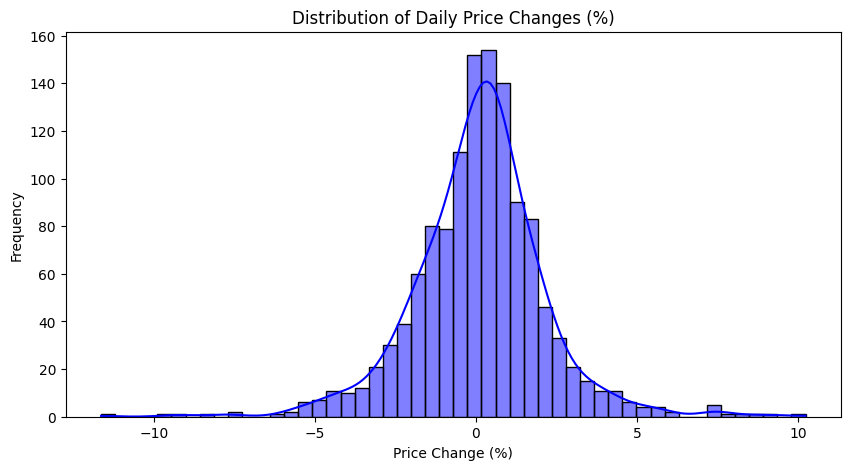

In [133]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Price Change (%)"], bins=50, kde=True, color="blue")
plt.xlabel("Price Change (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Price Changes (%)")
plt.show()


Volume vs Closing Price Scatter Plot


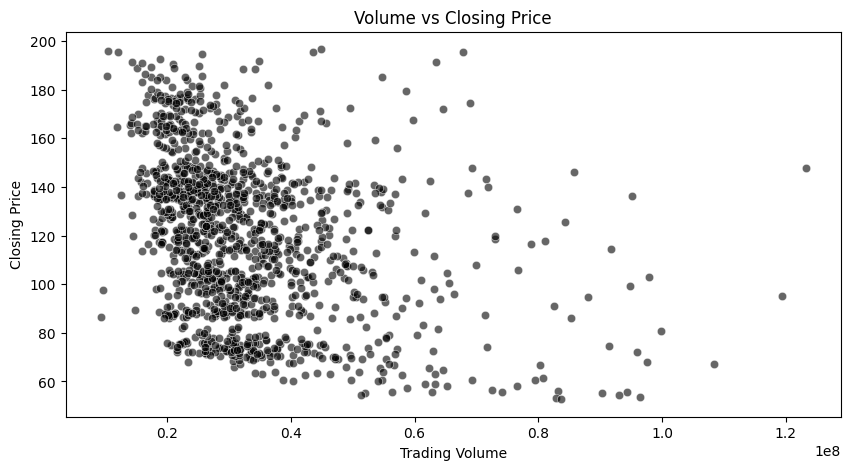

In [129]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Volume"], y=df["Close"], alpha=0.6,color="black")
plt.xlabel("Trading Volume")
plt.ylabel("Closing Price")
plt.title("Volume vs Closing Price")
plt.show()

MOVING AVERAGE PLOT

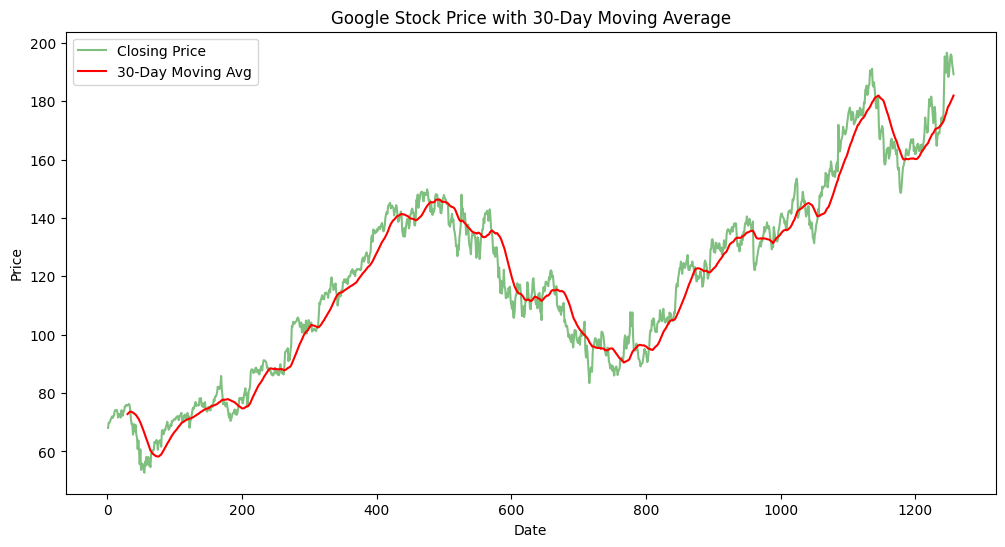

In [132]:
df["Moving Average (30 days)"] = df["Close"].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", color="green", alpha=0.5)
plt.plot(df.index, df["Moving Average (30 days)"], label="30-Day Moving Avg", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Google Stock Price with 30-Day Moving Average")
plt.legend()
plt.show()

CONCCLUSION 

after preprocessing the data , i did not normalize the data as im not using it for a model, so if anyone looked at it they would be able to understand it , the stock price varies from the opening and the closing 
the stock price has increased significantly since 2020 
a lot of features in  the data set are highly corelated because each one looks at the price at a time 
the trading volume change according to the stockl price obviously 
price changes increase signifactly in the middle of the day 